# 필요 library

In [1]:
# API 관련
from urllib.parse import urlencode, unquote
import requests
import json

# analysis 관련
import math
import numpy as np
import pandas as pd

## graph
import matplotlib.pyplot as plt
import seaborn as sns

### 글꼴 설정
import matplotlib.font_manager as fm
#### 글꼴 경로 설정
font_path = 'C:/Users/jisu0/Downloads/maruburi/TTF\MaruBuri-Regular.ttf'
#### 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font_name)

# DATA

## import

### API 불러오기 (대여 정보/ 시간별)

In [2]:
%%time

# 할당받은 개인키
my_key = '4f785242556a69733731794b4c6f57'

#API 호출
##1달간 목요일, 8-10시 사이의 이용수
dates = [20240307,20240314,20240321,20240329] #날짜, 4일(1주일 간격)
times = [7,8,9,10]  #(출근 시간대)

## 데이터 프레임 생성
use_0307_detail = pd.DataFrame()
use_0314_detail = pd.DataFrame()
use_0321_detail = pd.DataFrame()
use_0329_detail = pd.DataFrame()

## 데이터 가져오기
for i in dates :
    for j in times:
        #일단 날짜, 시간 별로 몇행이 있는지 확인
        url = f'http://openapi.seoul.go.kr:8088/{my_key}/json/tbCycleRentUseTimeInfo/1/100/{i}/{j}'
        response = requests.get(url)
        response_text = json.loads(response.text)
        ## 특정날짜, 시간대의 전체 행수 파악
        length = int(response_text["cycleRentUseTimeInfo"]['list_total_count'])
        #print(i,j,response_text["cycleRentUseTimeInfo"]['list_total_count'],
        #      len(json.loads(response.content)['cycleRentUseTimeInfo']['row']))
        
        ## 모든 행 가져오기
        ### 1000건이 1회 호출 최대값이라 끊어서 가져오기
        for k in range(1,length//1000+2):
            url_re = f'http://openapi.seoul.go.kr:8088/{my_key}/json/tbCycleRentUseTimeInfo/{(k-1)*1000+1}/{k*1000}/{i}/{j}'
            response_re = requests.get(url_re)
            response_text_re = json.loads(response_re.text)
            # 날짜별 분류
            if i == 20240307 :
                use_0307_detail = pd.concat([use_0307_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240314 :
                use_0314_detail = pd.concat([use_0314_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240321 :
                use_0321_detail = pd.concat([use_0321_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            else :
                use_0329_detail = pd.concat([use_0329_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])

                # 데이터 합치기 ## 혹시모를 상황에 대비, 일단 일별 구분
nomal_detail = pd.concat([use_0307_detail,use_0314_detail,use_0321_detail,use_0329_detail])

CPU times: total: 656 ms
Wall time: 1min 56s


In [3]:
%%time

# 할당받은 개인키
my_key = '4f785242556a69733731794b4c6f57'

#API 호출
##1달간 목요일, 8-10시 사이의 이용수
dates = [20240122,20240219,20240221,20240222,20240312,20240326,20240328] #날짜, 비 온 평일
times = [7,8,9,10]  #(출근 시간대)

## 데이터 프레임 생성
use_0122_detail = pd.DataFrame()
use_0219_detail = pd.DataFrame()
use_0221_detail = pd.DataFrame()
use_0222_detail = pd.DataFrame()
use_0312_detail = pd.DataFrame()
use_0326_detail = pd.DataFrame()
use_0328_detail = pd.DataFrame()

## 데이터 가져오기
for i in dates :
    for j in times:
        #일단 날짜, 시간 별로 몇행이 있는지 확인
        url = f'http://openapi.seoul.go.kr:8088/{my_key}/json/tbCycleRentUseTimeInfo/1/100/{i}/{j}'
        response = requests.get(url)
        response_text = json.loads(response.text)
        ## 특정날짜, 시간대의 전체 행수 파악
        length = int(response_text["cycleRentUseTimeInfo"]['list_total_count'])
        #print(i,j,response_text["cycleRentUseTimeInfo"]['list_total_count'],
        #      len(json.loads(response.content)['cycleRentUseTimeInfo']['row']))
        
        ## 모든 행 가져오기
        ### 1000건이 1회 호출 최대값이라 끊어서 가져오기
        for k in range(1,length//1000+2):
            url_re = f'http://openapi.seoul.go.kr:8088/{my_key}/json/tbCycleRentUseTimeInfo/{(k-1)*1000+1}/{k*1000}/{i}/{j}'
            response_re = requests.get(url_re)
            response_text_re = json.loads(response_re.text)
            # 날짜별 분류
            if i == 20240219 :
                use_0219_detail = pd.concat([use_0219_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240122 :
                use_0122_detail = pd.concat([use_0122_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240221 :
                use_0221_detail = pd.concat([use_0221_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240222 :
                use_0222_detail = pd.concat([use_0222_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240312 :
                use_0312_detail = pd.concat([use_0312_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            elif i == 20240326 :
                use_0326_detail = pd.concat([use_0326_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])
            else :
                use_0328_detail = pd.concat([use_0328_detail,pd.DataFrame(response_text_re['cycleRentUseTimeInfo']['row'])])

                # 데이터 합치기 ## 혹시모를 상황에 대비, 일단 일별 구분
rain_detail = pd.concat([use_0122_detail,use_0219_detail,use_0222_detail,use_0312_detail])
                         #use_0221_detail,,use_0326_detail])

CPU times: total: 391 ms
Wall time: 42.8 s


In [4]:
# 비 온 날
print('use_0122_detail',len(use_0122_detail))
print('use_0219_detail',len(use_0219_detail))
#print('use_0221_detail',len(use_0221_detail)) ## 비 많이 온 날
print('use_0222_detail',len(use_0222_detail))
print('use_0312_detail',len(use_0312_detail))
#print('use_0326_detail',len(use_0326_detail)) ## 비 많이 온 날
print('')

#파업일
print('use_0328_detail',len(use_0328_detail))
print('')

# 비 안온 날
print('use_0307_detail',len(use_0307_detail))
print('use_0314_detail',len(use_0314_detail))
print('use_0321_detail',len(use_0321_detail))
print('use_0329_detail',len(use_0329_detail))

use_0122_detail 11112
use_0219_detail 7244
use_0222_detail 3923
use_0312_detail 10463

use_0328_detail 15168

use_0307_detail 25128
use_0314_detail 26973
use_0321_detail 27066
use_0329_detail 18937


### 대여소 정보

In [5]:
rent_spot_info = pd.read_csv('C:\\Users\\jisu0\\Downloads\\공공자전거 대여소 정보(23.12월 기준)_수정.csv')
rent_spot_info_gangseo = rent_spot_info[rent_spot_info['자치구']=="강서구"]

### 강우량(2024)

In [6]:
rain = pd.read_csv('C:\\Users\\jisu0\\바탕 화면\\공모전\\강서구_빅데이터\\2024_강우량.csv',encoding='cp949')

In [7]:
rain[rain['날짜'].isin(['2024-03-29'])]

,지점,지점명,일시,년,월,일,시간,강수량(mm),요일,날짜


In [18]:
rain_filter = rain[(rain['강수량(mm)'] != 0 )& (rain['시간'] < 10 )& (rain['시간'] >3 )& (rain['일'] != 26)& (rain['날짜'] != '2024-02-21') ]
#3월 26일은 비가 많이 옴

In [19]:
rain_filter = rain_filter[rain_filter['날짜'].isin(['2024-01-22','2024-02-19','2024-02-22','2024-03-12','2024-03-28'])]
rain_filter = rain_filter[~((rain_filter['날짜']== '2024-02-22')&(rain_filter['시간'] ==6))]

## 전처리

In [10]:
rent_spot_info_gangseo_list = rent_spot_info_gangseo['대여소\n번호']

In [11]:
# 형변환
rain_detail = rain_detail.astype({'RENT_ID':'int'})
use_0328_detail = use_0328_detail.astype({'RENT_ID':'int'})
nomal_detail = nomal_detail.astype({'RENT_ID':'int'})

In [12]:
gangseo_detail_rain = rain_detail[rain_detail['RENT_ID'].isin(rent_spot_info_gangseo_list)]
gangseo_detail_nomal = nomal_detail[nomal_detail['RENT_ID'].isin(rent_spot_info_gangseo_list)]
gangseo_detail_0328 = use_0328_detail[use_0328_detail['RENT_ID'].isin(rent_spot_info_gangseo_list)]

In [13]:
gangseo_detail_rain.head()

,RENT_DT,RENT_HR,RENT_ID,RENT_NM,RENT_TYPE,GENDER_CD,AGE_TYPE,USE_CNT,EXER_AMT,CARBON_AMT,MOVE_METER,MOVE_TIME,START_INDEX,END_INDEX,RNUM
0,2024-01-22,7,2701,2701. 마곡나루역 5번출구 뒤편,정기권,,~10대,1,18.03,0.18,758.88,5,0,0,1
2,2024-01-22,7,3774,3774. 마곡9단지 910동 상가앞,정기권,,~10대,1,30.00,0.29,1262.69,6,0,0,3
4,2024-01-22,7,1150,1150. 송정역 1번출구,정기권,,20대,1,45.07,0.42,1806.68,9,0,0,5
5,2024-01-22,7,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,,20대,1,34.86,0.25,1073.59,4,0,0,6
6,2024-01-22,7,1155,1155. 기쁜우리복지관,정기권,,20대,1,28.51,0.22,960.00,4,0,0,7


In [14]:
gangseo_detail_rain['RENT_DT'].unique()

array(['2024-01-22', '2024-02-19', '2024-02-22', '2024-03-12'],
      dtype=object)

# 시각화

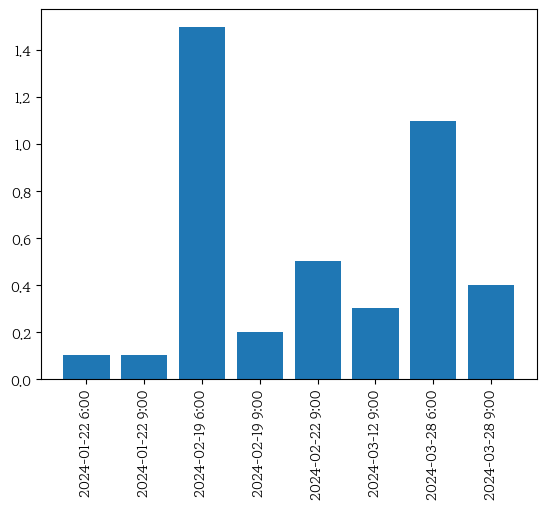

In [20]:
plt.bar(rain_filter['일시'],rain_filter['강수량(mm)'])
plt.xticks(rotation = 90)

plt.show()

## 날짜별 시간대 대여량 파악

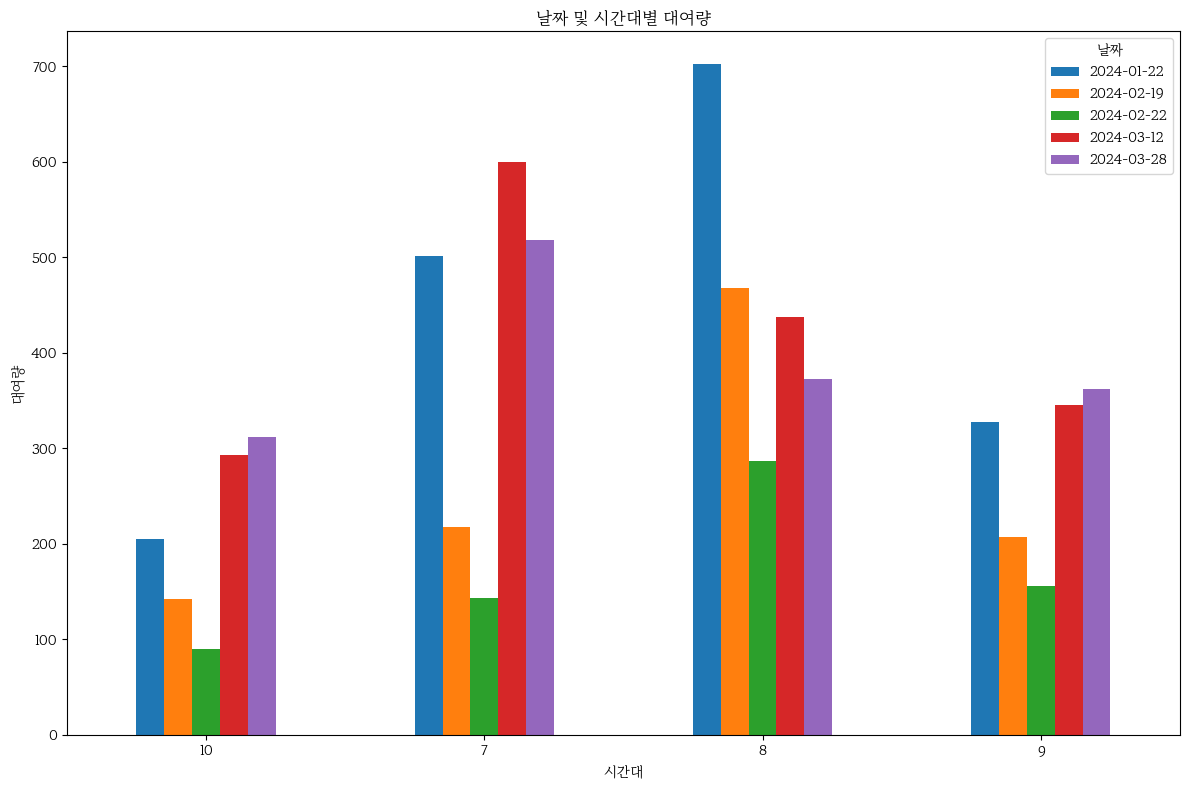

In [21]:
# 'RENT_DT'와 'RENT_HR'로 그룹화하고 각 그룹의 크기 계산
grouped = pd.concat([gangseo_detail_rain,gangseo_detail_0328]).groupby(['RENT_DT', 'RENT_HR']).size().reset_index(name='n')

# 'RENT_DT'와 'RENT_HR'를 멀티인덱스로 하는 피벗 테이블 생성 ## 그룹화된 그래프를 위해
pivot_table = grouped.pivot(index="RENT_HR", columns="RENT_DT", values="n").fillna(0)

# 막대 그래프 그리기
pivot_table.plot(kind='bar', figsize=(12, 8))

plt.title("날짜 및 시간대별 대여량")
plt.xlabel("시간대")
plt.ylabel("대여량")
plt.xticks(rotation=0)  # X축 레이블 회전 설정
plt.legend(title='날짜')
plt.tight_layout()  # 플롯의 레이아웃 자동 조정

plt.show()

비온 날들 끼리 비교해 봤을 때 버스 파업이 있던 28일이 따릉이 이용 빈도가 높은 편이다.

In [ ]:
pivot_table

In [ ]:
# 'RENT_DT'와 'RENT_HR'로 그룹화하고 각 그룹의 크기 계산
grouped = pd.concat([nomal_detail,use_0328_detail]).groupby(['RENT_DT', 'RENT_HR']).size().reset_index(name='n')

# 'RENT_DT'와 'RENT_HR'를 멀티인덱스로 하는 피벗 테이블 생성 ## 그룹화된 그래프를 위해
pivot_table = grouped.pivot(index="RENT_HR", columns="RENT_DT", values="n").fillna(0)

# 막대 그래프 그리기
pivot_table.plot(kind='bar', figsize=(12, 8))

plt.title("날짜 및 시간대별 대여량")
plt.xlabel("시간대")
plt.ylabel("대여량")
plt.xticks(rotation=0)  # X축 레이블 회전 설정
plt.legend(title='날짜')
plt.tight_layout()  # 플롯의 레이아웃 자동 조정

plt.show()

# 

In [ ]:
nm_n = pd.merge(gangseo_detail_0328.groupby(['RENT_NM','RENT_HR']).size().reset_index(name='n').sort_values('n', ascending=False).rename(columns={'n':'D_day'}),
         pd.merge(gangseo_detail_rain.groupby(['RENT_NM','RENT_HR']).size().reset_index(name='n').sort_values('n', ascending=False).rename(columns={'n':'rain'}),
                  gangseo_detail_nomal.groupby(['RENT_NM','RENT_HR']).size().reset_index(name='n').sort_values('n', ascending=False).rename(columns={'n':'normal'}),
                  on=('RENT_NM','RENT_HR')),
         on=('RENT_NM','RENT_HR'))
nm_n['rain'] = nm_n['rain']/4
nm_n['normal'] = nm_n['normal']/4
nm_n.query('(D_day > 1)&(rain>1)&(normal>1)&(D_day > rain)')

In [ ]:
gangseo_detail_rain.groupby(['RENT_DT', 'RENT_HR','RENT_NM']).size().reset_index(name='n').sort_values('n', ascending=False).head(40)

In [ ]:
gangseo_detail_nomal.groupby(['RENT_DT', 'RENT_HR','RENT_NM']).size().reset_index(name='n').sort_values('n', ascending=False).head(40)

In [ ]:
gangseo_detail_0328.groupby(['RENT_DT', 'RENT_HR','RENT_NM']).size().reset_index(name='n').sort_values('n', ascending=False).head(40)

In [ ]:
import folium

# Create a map centered around Pyongyang, North Korea
m = folium.Map(location=[37.57, 126.84], zoom_start=13, width=800, height=500)

# Add different tile layers with attribution
folium.TileLayer("Stamen Terrain", attr="Stamen Terrain").add_to(m)
folium.TileLayer("Stamen Toner", attr="Stamen Toner").add_to(m)
folium.TileLayer("Stamen Watercolor", attr="Stamen Watercolor").add_to(m)

# Add layer control to switch between tile layers
folium.LayerControl().add_to(m)

# Display the map
m

In [ ]:
# Circle

for i in 
folium.Circle(
    location=[37.54455152583346, 127.05564949938811],
    radius=100, # 원 크기
    color='#eb9e34', # 원 선 색상
    fill_color='red', # 원 내부 색상
    popup='Circle popup',
    tooltip='Circle tooltip'
).add_to(m)

In [ ]:
rent_spot_info_gangseo.head(5)